# SalesSphere – A 360° Retail Sales Intelligence System
Performed end-to-end EDA on the Superstore dataset using Python (pandas, seaborn, matplotlib). Extracted business insights related to category-wise performance, segment profitability, and discount-profit correlation.

Exported cleaned dataset for further analysis using SQL and dashboarding via Power BI.

Project simulates real-world scenarios faced by FMCG clients served by Deloitte or platforms like Flipkart.



# Step 1: Importing Required Libraries

We will start by importing all the essential libraries for data loading, analysis, and visualization in Python.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For inline plots
%matplotlib inline


# Step 2: Loading the Dataset

We are using the **Superstore Sales Dataset** which contains information about orders, sales, profits, discounts, and more across different categories and regions.


In [2]:
df = pd.read_csv('/kaggle/input/supestore-data/Superstore_Sales.csv', encoding='latin1')
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# Step 3: Basic Dataset Information

Let’s check the data types, non-null counts, and overall structure of the dataset.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

# Step 4: Summary Statistics

This step helps us understand the numerical distribution of our features like Sales, Profit, and Discount.


In [4]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# Step 5: Checking for Missing Values

We will check for any null/missing values in the dataset to ensure data quality.


In [5]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

# Step 6: Checking for Duplicates

It’s important to remove duplicate entries that can skew the analysis.


In [6]:
print("Duplicate Rows:" , df.duplicated().sum())
df.drop_duplicates(inplace=True)

Duplicate Rows: 0


# Step 7: Dataset Shape and Column Names

Let’s see how many rows and columns we have, and the names of all columns.


In [7]:
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())


Shape: (9994, 21)
Columns: ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']


 # Step 8: Category-wise Sales & Profit (Bar Plot)

# Step 8: Sales & Profit by Category

Let’s analyze which product categories are contributing the most to sales and profit using bar plots.


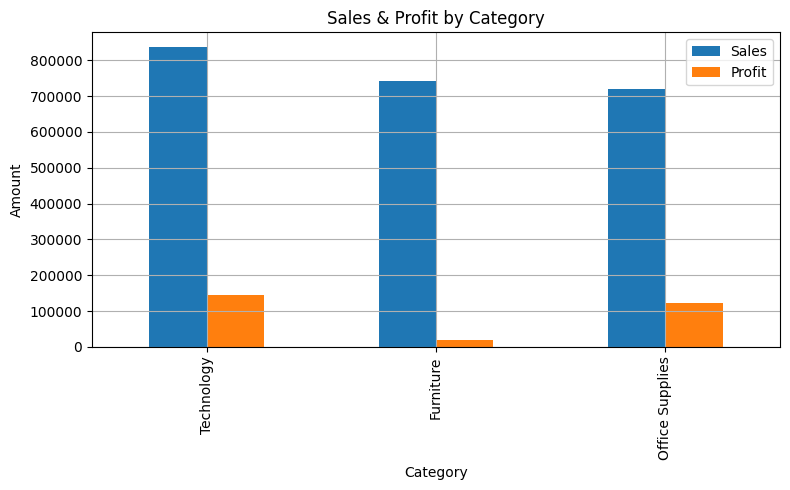

In [8]:
cat_sales = df.groupby('Category')[['Sales', 'Profit']].sum().sort_values('Sales', ascending=False)

cat_sales.plot(kind='bar', figsize=(8,5), legend=True)
plt.title('Sales & Profit by Category')
plt.xlabel('Category')
plt.ylabel('Amount')
plt.grid(True)
plt.tight_layout()
plt.show()


# Step 9: Region-wise Sales Distribution

Pie chart showing percentage share of sales across different regions.


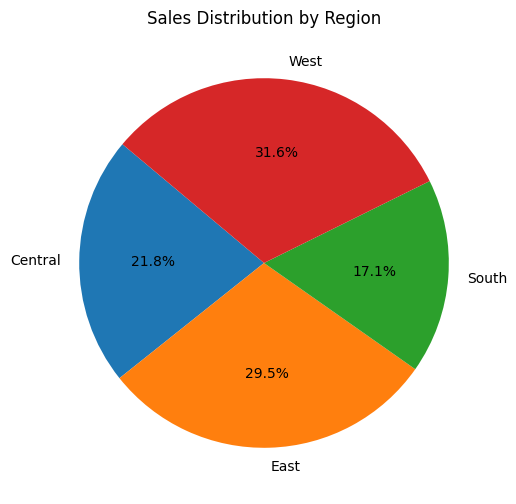

In [9]:
region_sales = df.groupby('Region')['Sales'].sum()

region_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, figsize=(6,6))
plt.title('Sales Distribution by Region')
plt.ylabel('')
plt.show()


# Step 10: Relationship Between Discount and Profit

Scatter plot to see how discount levels affect profit margins.


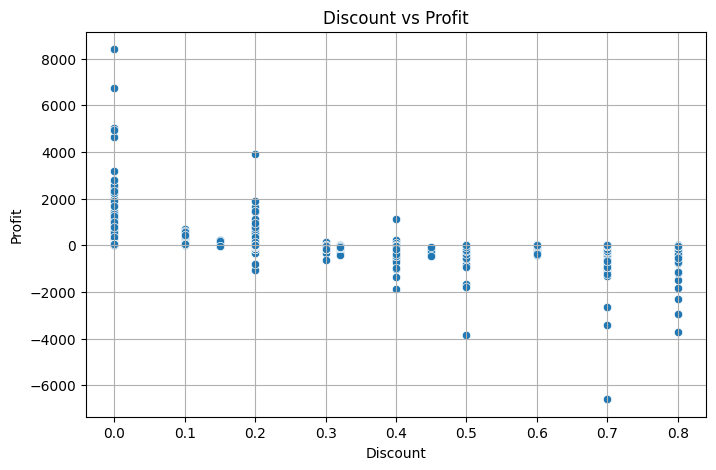

In [10]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Discount', y='Profit')
plt.title('Discount vs Profit')
plt.grid(True)
plt.show()


# Step 11: Sales Over Time

Convert Order Date to datetime format and plot monthly sales trend.


/tmp/ipykernel_13/3649353490.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.set_index('Order Date').resample('M')['Sales'].sum()


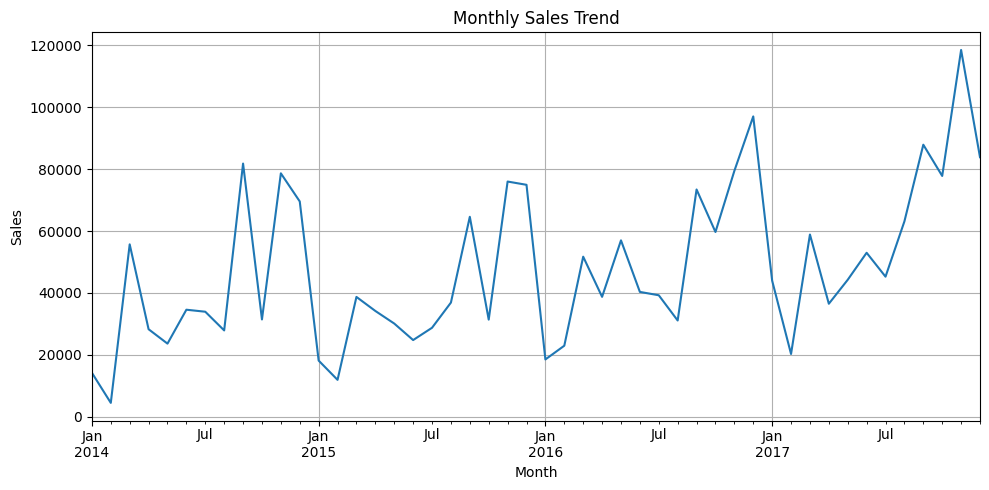

In [11]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

monthly_sales = df.set_index('Order Date').resample('M')['Sales'].sum()

plt.figure(figsize=(10,5))
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


# Step 12: Segment-wise Profit

Let’s check which customer segment gives the most profit.


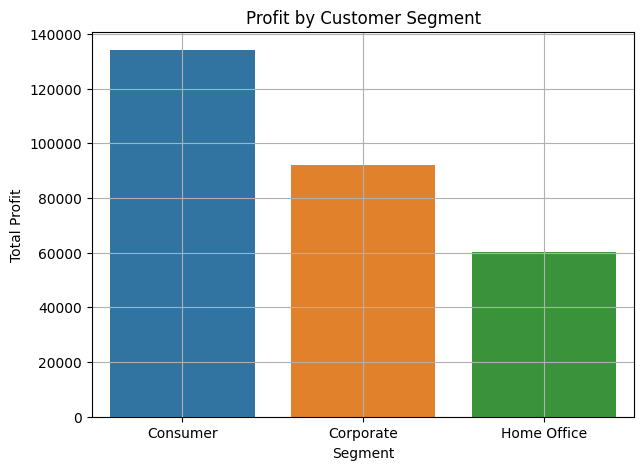

In [12]:
segment_profit = df.groupby('Segment')['Profit'].sum().sort_values(ascending=False)

plt.figure(figsize=(7,5))
sns.barplot(x=segment_profit.index, y=segment_profit.values)
plt.title('Profit by Customer Segment')
plt.ylabel('Total Profit')
plt.xlabel('Segment')
plt.grid(True)
plt.show()


# Step 13: Sub-Category-wise Sales and Profit (Heatmap)

Heatmap helps us quickly visualize which sub-categories perform better in sales and profit.


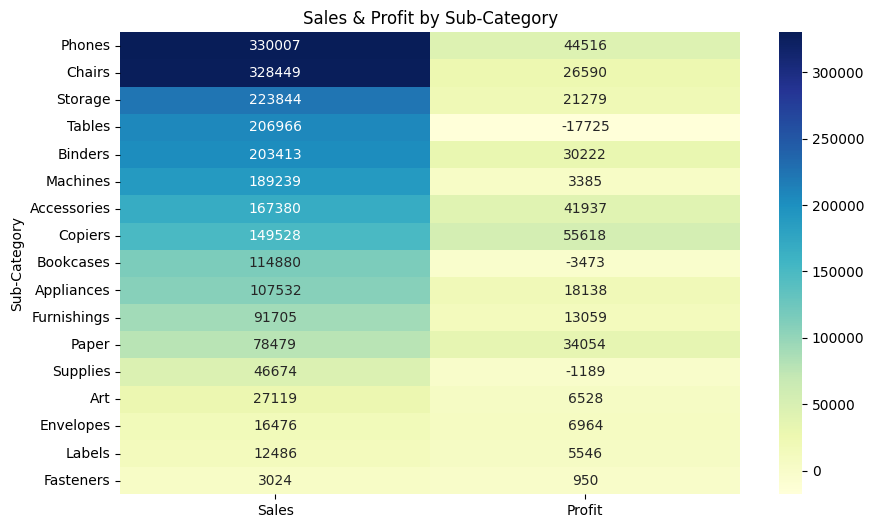

In [13]:
subcat_data = df.groupby('Sub-Category')[['Sales', 'Profit']].sum().sort_values('Sales', ascending=False)

plt.figure(figsize=(10,6))
sns.heatmap(subcat_data, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Sales & Profit by Sub-Category')
plt.show()


# Step 14: Correlation Matrix

Let’s find correlations between numerical variables such as Sales, Profit, and Discount.


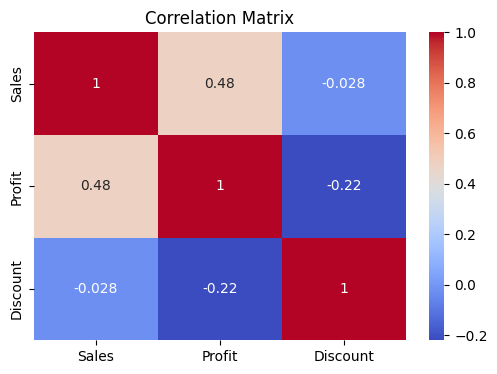

In [14]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['Sales', 'Profit', 'Discount']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Step 15: Export Cleaned Data for SQL & Power BI

We’ll export the cleaned data to CSV format to use in SQL queries and Power BI dashboards.


# Step 15: Export Cleaned Data for SQL & Power BI

Now that our dataset is cleaned, we will export it to a `.csv` file. This file will be used later in SQL queries and Power BI dashboard creation.

After running the code below, you can download the file from the "Output > Files" section in Kaggle Notebook.


In [15]:
df.to_csv('Superstore_Cleaned.csv', index=False)


# Step 16: Segment-wise Profit – Final Insight

We grouped the dataset by "Segment" and calculated total profit per segment.

Based on the analysis:
- The **Consumer** segment has generated the **highest profit**
- Followed by **Corporate**, and then **Home Office**

This kind of insight is useful for business stakeholders to decide which segment to prioritize for future promotions or investments.


In [16]:
segment_profit = df.groupby('Segment')['Profit'].sum().sort_values(ascending=False)
print(segment_profit)


Segment
Consumer       134119.2092
Corporate       91979.1340
Home Office     60298.6785
Name: Profit, dtype: float64


<Axes: xlabel='Segment'>

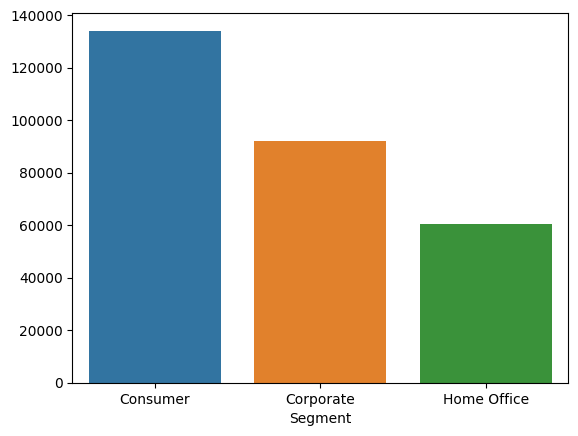

In [17]:
sns.barplot(x=segment_profit.index, y=segment_profit.values)



#  Final Insight: Segment-wise Profit Analysis

Based on the analysis of total profit across different customer segments, we conclude:

- ✅ **Consumer Segment** is the most profitable, generating a total profit of **₹1,34,119.21**  
- 📊 **Corporate Segment** comes second with a total profit of **₹91,979.13**  
- 🏠 **Home Office Segment** is the least profitable with **₹60,298.68** profit

**Business Implication:**
The company should consider focusing more marketing and discount strategies toward the **Consumer segment** to boost revenue further, while analyzing why **Home Office** performs lower — maybe due to less demand or high returns in that segment.
